![](https://www.nvidia.com/content/dam/en-zz/Solutions/research/research-home-areas-computer-vision-407-ud@2X.jpg)<br>

In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
% matplotlib inline

# Getting the data
I will use the simple cats and dogs Kaggle dataset.

## Retrieving the data

In [5]:
FOLDER = "C:/data/images/cats_and_dogs/"

In [9]:
import glob
from PIL import Image

In [7]:
files = glob.glob(FOLDER+"*.JPG")
len(files)

25000

##### Visualizing a sample image

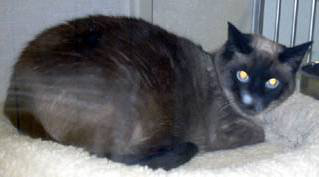

In [13]:
img = Image.open(files[10])
img

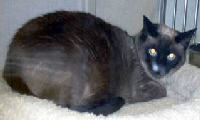

In [16]:
img.resize((200,120))

## Building the dataset
### Building X

In [ ]:
X_train = np.vstack([np.expand_dims(np.array(Image.open(file).resize((180,120))),axis = 0) for file in tqdm(files)])

 55%|██████████▎        | 13636/25000 [01:04<00:56, 200.88it/s]

In [ ]:
X_train.shape

### Building the target variable y

In [ ]:
y = np.array([int('cat' in os.path.split(file)[1]) for file in files]).reshape(-1,1)
y

In [ ]:
pd.Series(np.squeeze(y.transpose())).value_counts()

## Visualizing the data

In [ ]:
def plot_sample(images,n_row=4, n_col=10):
    """
    Helper function to plot a gallery of images
    """
    
    # Random selection
    selection = np.random.randint(0,len(images),n_row*n_col)
    selection = images[selection]
    
    # Plot figure
    plt.figure(figsize=(1.5 * n_col, 1.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(selection[i],interpolation="nearest",cmap='Greys')
        plt.xticks(())
        plt.yticks(())

In [ ]:
plot_sample(X_train)

## Preparing the data

In [ ]:
X_train = np.divide(X_train,255)

# Creating the model

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras_tqdm import TQDMNotebookCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import Callback

In [74]:
from keras import applications
# include_top: whether to include the 3 fully-connected layers at the top of the network.
model = applications.MobileNet(include_top=False,input_shape=(3,32,32))

ValueError: The input must have 3 channels; got `input_shape=(3, 32, 32)`

In [ ]:
X_transformed = model.predict(X_train,batch_size = 128)

In [ ]:
from keras.datasets import 